## OOI Endurance Array

![Endurance Array](https://ooinet.oceanobservatories.org/img/home/coastal_endurance/endurance_1.jpg) 

This example focuses on Acoustic Doppler Current Profiler (ADCP) data from the inshore mooring on the Oregon line. The ADCP is mounted at the bottom and looks upward throughout the water column, measuring velocity at a series of depths.

![Oregon Endurance Line](https://ooinet.oceanobservatories.org/img/home/coastal_endurance/endurance_2.png)

The [OOI Data Portal](https://ooinet.oceanobservatories.org/) can be used to access data from any OOI instrument. The data typically come in NetCDF format. To create a custom data catalog, you need to sign up for a free account.

A data catalog for the bottom-mounted ADCP at the Oregon inshore mooring has already been created:

https://opendap.oceanobservatories.org/thredds/catalog/ooi/tconnolly@mlml.calstate.edu/20200421T020908490Z-CE01ISSM-MFD37-03-CTDBPC000-recovered_inst-ctdbp_cdef_instrument_recovered/catalog.html

### Load data

In addition to standard libraries, the `import tseries as ts` line imports the module contained in the file `tseries.py` contained in this repository.

In [8]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from matplotlib import mlab
import scipy.signal as signal
from scipy import stats

import tseries as ts

In [7]:
local_dataset = 'ooi_data/deployment0009_CE01ISSM-MFD35-04-ADCPTM000-recovered_inst-adcp_velocity_earth_20180403T043000-20180912T224545.920000.nc'

The ADCP data for April-September 2018 is included in this repository. The data set is in NetCDF format, and can be easily opened with the [xarray](http://xarray.pydata.org) package.

In [ ]:
# insert code here


### ADCP post-processing

First, for convenience, create variables for eastward velocity ($u$) and northward velocity ($v$) in units of m/s.

In [ ]:
ds['u'] = ds['water_velocity_east']/1000
ds['u'].attrs['units'] = 'm/s'

ds['v'] = ds['water_velocity_north']/1000
ds['v'].attrs['units'] = 'm/s'


The dataset provided by OOI includes the following variables:
* `depth_from_pressure` is the total water column depth, calculated from the pressure sensor. Dimensions: `(obs)`
* `bin_depths` is the depth of each ADCP bin below the sea surface, which moves up and down. The bin depths constantly change in time. Dimensions: `(obs, bin)`

The code below creates additional variables for keeping track of depths in the ADCP data:
* `bin_height` is the height of each ADCP bin above the bottom. These heights are fixed, since the ADCP is mounted at the bottom. Dimensions: `(bin)`
* `bin_depths_avg` is the average depth below the surface for each ADCP bin. These depths are fixed in time since they are defined in relation to a time average. Dimensions: `(bin)`
* `sea_surface` is the height of the sea surface, relative to the time average. Dimensions: `(obs)`
* `bottom_depth_avg` is the average bottom depth, calculated from the pressure sensor. This is a single value with no dimensions. Dimensions: `()`

In [ ]:
ds['bin_height'] =  ds['depth_from_pressure'][0] - ds['bin_depths'][0,:]
ds['bin_height'].attrs['units'] = 'm'

ds['bin_depths_avg'] = ds['bin_height']-np.mean(ds['depth_from_pressure'])
ds['bin_depths_avg'].attrs['units'] = 'm'

ds['sea_surface'] = ds['depth_from_pressure']-np.mean(ds['depth_from_pressure'])
ds['sea_surface'].attrs['units'] = 'm'

ds['bottom_depth_avg'] = np.mean(ds['depth_from_pressure'])
ds['bottom_depth_avg'].attrs['units'] = 'm'

### ADCP quality control

The acoustic signal of the ADCP can be reflected at the sea surface, leading to contamination. This plot shows the echo intensity for one of the four beams of the ADCP. There is bad data near the sea surface, as well as data above the sea surface which needs to be discarded.

In [ ]:
plt.figure(figsize=(8,3))
plt.pcolor(ds['time'],ds['bin_height'],
           ds['corrected_echo_intensity_beam1'].T)
plt.plot(ds['time'],ds['depth_from_pressure'],'k-') 

To get a better look, select a date range for plotting a subset of the data.

In [ ]:
t1 = np.datetime64('2018-07-01 00:00:00')
t2 = np.datetime64('2018-07-15 00:00:00')

In [ ]:
plt.figure(figsize=(8,3))
plt.pcolor(ds['time'], ds['bin_height'],
           ds['corrected_echo_intensity_beam1'].T)
plt.plot(ds['time'], ds['depth_from_pressure'],'k-') 
plt.xlim([t1,t2])

Looking at the velocity, the noise near the surface is apparent.

In [ ]:
plt.figure(figsize=(8,3))
# insert code here (everything below)


We can remove the noise by selecting only good data at least 4m below the sea surface. 

In [ ]:
# insert code here


In [ ]:
# insert code here


We can use xarray to take an average over time, but we have to specify the dimension.

### Exercises

Plot the northward velocity ($v$) variable as a function of time and height above the bottom. Which velocity component tends to be stronger, the $u$ or $v$ component?

In [ ]:
# insert code here


Create a new variable called `ds['uda']` which is the average of `ds['u']` over depth. There should be one value for each separate time. *Hints:* What is the name of the dimension that you want to average over? How can you check the names of the dimensions in the dataset?

Do the same for the $v$-component. Create a new variable called `ds['vda']` which is the average of `ds['v']` over depth. There should be one value for each separate time. 

Make a scatter plot between the depth-averaged $\bar{u}$ and $\bar{v}$ velocity components. Which component tends to have a greater magnitude, and why?

Give your new variables attributes for units.

### Correlation functions

**Overall Goal:** Based on the decorrelation time scale, how many *effective* degrees of freedom ($\nu^* = N^* - 2$) does this time series have?

Recall:

$$ N^* = \frac{N \Delta t}{t^*} $$

where $t^*$ is a *dominant time scale*. In practice, this is defined by a *decorrelation time scale* or an *integral time scale*.

#### Preliminary exercises

1) How many samples ($N$) are in the depth-averaged $\bar{v}$ time series?

2) What is the time interval $\Delta t$ betwen samples?

3) What is the total amount of time in the dataset?

*insert answer here*

#### Manually computing autocorrelation

Correlation at zero lag ($\tau$ = 0).

In [ ]:
# insert code here


In [ ]:
# insert code here


Correlation at lag ($\tau$ = $\Delta t$).

In [ ]:
# insert code here


Correlation at lag ($\tau = 2 \Delta t$).

In [ ]:
# insert code here


In [ ]:
plt.figure()
plt.plot(ds['time'][2:], ds['vda'][2:], 'r-')
plt.plot(ds['time'][2:], ds['vda'][:-2], 'b-')
plt.xlim([ds['time'][0], ds['time'][100]])
plt.xticks(rotation=30)

#### Exercises

Compute the autocorrelation (r) for a lag of $\tau$ = 3 hours

In [ ]:
# insert code here


### Autocorrelation function

Computing cross-correlation and autocorrelation functions is common enough that there is a matplotlib function to plot them. This function also allows you to automatically detrend the data beforehand.

In [ ]:
plt.figure()
lags,r,_,_ = plt.xcorr(ds['vda'],ds['vda'],detrend=mlab.detrend,maxlags=1000);
plt.xlabel('lag')
plt.ylabel('r')
plt.title('autocorrelation function, depth-averaged v')

#### Exercises

* From the autocorrelation plot above, visually estimate the *decorrelation time scale* $t^*$ (the time lag $\tau$ at which $r$ decreases to 0, in units of hours or days). Note: you will have to convert the number of lags on the x-axis to time using the sample interval $\Delta t$.
* Based on the decorrelation time scale, how many *effective* degrees of freedom ($N^*$) does this time series have?

#### Correlation between two variables

We want to see if there is a significant correlation between depth-averaged velocity `vda` and temperature.

#### Preliminary exercise

- What are the units of temperature in this dataset?

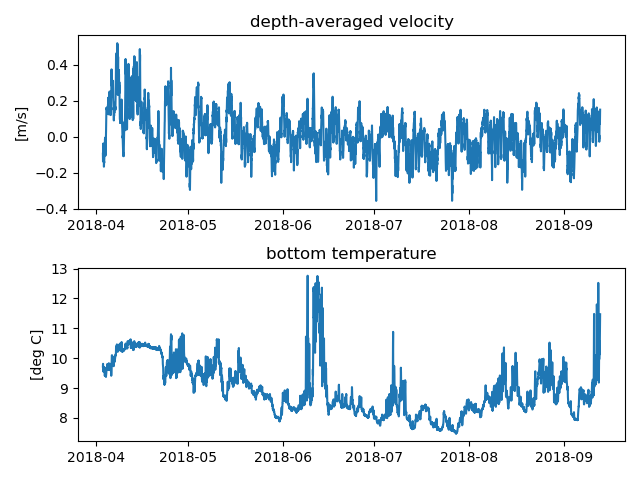

In [ ]:
plt.figure()
plt.subplot(211)
plt.plot(ds['time'], ds['vda'])
plt.title('depth-averaged velocity')
plt.ylabel('[m/s]')

plt.subplot(212)
plt.plot(ds['time'], ds['temperature']/100)
plt.title('bottom temperature')
plt.ylabel('[deg C]')
plt.tight_layout()

#### Exercises

1. Make a scatter plot of `vda` vs. `temperature`. Based on your visual intuition, is there a significant correlation? Take a guess at what you think the correlation coefficient (a.k.a. r-value) will be.



2. Use the `linregress` function (from the SciPy stats library) to determine a correlation coefficient and p-value. What does the p-value say about statistical significance, and why is this misleading?



3. Based on your effective degrees of freedom, and Emery and Thomson's table of significant correlation coefficients, is the correlation significant? How does using effective degrees of freedom $N^*$, instead of the total number of data points $N$, affect your conclusions?

### Spectral analysis intro

These exercises use the time series for depth-averaged velocity $\bar{v}$ and bottom pressure.

In [ ]:
plt.figure()
# insert code here


In [ ]:
plt.figure()
# insert code here


### Exercises

* How many samples $N$ are in the time series?
* What is the sample interval $\Delta t$, in hours? In days?
* What is the fundamental frequency of the time series (in cycles per day)?
* What is the sampling frequency of the time series (in cycles per day)?

In [ ]:
from scipy.signal import periodogram
# insert code here


In [ ]:
# insert code here


### Exercises

* Plot the periodogram (spectrum) for pressure
* Label the plot with the appropriate units
* Discuss the similarities and differences between the spectra of velocity and pressure.

#### Pressure spectrum

In [ ]:
# insert code here


### Better spectral estimates
* Sensible data windows
* Averaging
* Pre-whitening
* Confidence intervals

In [ ]:
from scipy.signal import welch

In [ ]:
N = len(ds['vda'])
fs = 48. # sampling frequency? units?
# fnyquist

In [ ]:
# raw periodogram (noisy, biased)
f,S = welch(ds['vda'],fs = 48.,nperseg=N, window='boxcar')

# Welch's method with winlen N/2
winlen = N/2
f2,S2 = welch(ds['vda'],fs = 48.,nperseg=winlen,window='hann',detrend='linear')

In [ ]:
plt.figure()
plt.loglog(f,S)
plt.xlabel('frequency [cpd]') # units? [cpd], 
plt.ylabel('PSD ') # units? [m$^2$ s$^{-2}$ cpd$^{-1}$], variance/frequency

In [ ]:
plt.loglog(f2,S2)

In [ ]:
from scipy.stats import chi2

M = winlen/2
dof = N/M # dof depends on length of window
edof = (8/3)*dof # bonus points for using sensible window (Hanning)

lower = edof/chi2.ppf(0.975,edof)
upper = edof/chi2.ppf(0.025,edof)

In [ ]:
fplot = 5 # horizontal position of CI
Splot = 0.01 # vertical position of CI

plt.plot(np.array([fplot,fplot]),Splot*np.array([lower,upper]),'k-')
plt.text(fplot,Splot,' 95% (Welch)')

* Change the window length to N/4. Note how the shape of the spectrum changes. Note how the confidence intervals change. Do the same for a window length of N/8.
* What are the advantages of a shorter window length (more averaging)? What are the disadvantages?

### Filtering (next class)

#### Preliminary exercises
* To remove tidal fluctations from the Oregon velocity time series, we will filter the time series to remove high-frequency fluctionas with periods less than 33 hours. If the cutoff period of the filter is 33 hours, what is the corresponding frequency in cycles per hour?
* In this data set, how many observations are collected in 33 hours?

In [ ]:
T_cutoff = 33
f_cutoff = 1/33*24 # 1/hour * 24 hours/day = cpd

In [ ]:
# xarray rolling mean (33 hours, or 66 observations)
ds['vda_davg'] = ds['vda'].rolling(obs=66,center=True).mean()

# PL64 filter (WHOI)
ds['vda_filt'] = ts.pl64(ds['vda'],T=66)

In [ ]:
plt.figure()
plt.plot(ds['time'],ds['vda'])
plt.plot(ds['time'],ds['vda_davg'])
plt.plot(ds['time'],ds['vda_filt'])
plt.legend(['original','rolling boxcar','PL64 filter'])

Show:
- Zoom in on smoothed fluctuations
- Zoom in on edges to show lost information

In [ ]:
ii = np.isfinite(ds['vda_davg'])

In [ ]:
fdavg,Sdavg = welch(ds['vda_davg'][ii],fs = 48.,nperseg=winlen/2,window='hanning',
                    detrend='linear')

In [ ]:
plt.figure()
plt.loglog(f2,S2)
plt.loglog(fdavg,Sdavg)

On the same axis as the spectrum of rolling mean time series, plot:
- the spectrum of the original time series
- the spectrum of the time series filtered with the PL64 filter

Which smoothing method is more effective at removing high-frequency fluctuations with periods of less than 33 hours?

Which smoothing method is more effective at retaining low-frequency fluctuations with periods greater than 33 hours?

In [ ]:
jj = np.isfinite(ds['vda_filt'])
ffilt,Sfilt = welch(ds['vda_filt'][jj],fs = 48.,nperseg=winlen/2,window='hanning',
                    detrend='linear')

In [ ]:
plt.loglog(ffilt,Sfilt)

In [ ]:
plt.legend(['unfiltered','rolling mean','PL64 filter'])

In [ ]:
yl = plt.ylim()
plt.plot([f_cutoff,f_cutoff],yl,'k--')
plt.ylim(yl)

In [ ]:
plt.xlabel('frequency [cpd]')
plt.ylabel('PSD [m$^2$ s$^{-2}$ cpd$^{-1}$]')